# 연관 분석 기초_사전과제
-----
## 1. 연관 분석이란?
-----
### (1) 연관 분석의 정의
: 일련의 거래나 사건 안에 존재하는 항목 간의 일정한 연관 규칙을 발견하는 분석. 정답이 없기에 비지도 학습이다.

### (2) 연관규칙 분석
1. 연관 규칙의 형태
   * 'A를 구매하였을 때, B 또한 구매할 것이다.'같은 if-them 형식이며 A(조건절)->B(결과절) 로 표현된다. 
   * 조건절과 결과절을 구성하는 아이템들은 '아이템 집합'이라 함
   * 아이템 집합은 상호 배반이어야 한다.
2. 주의: 상관관계는 파악 가능하지만 **인과관계는 알 수 없다** (함께 자주 나타난다의 의미일 뿐이다.원인임은 알 수 없음)
3. 연관분석 vs 협업 필터링
   * 연관 분석은 추천 시스템의 초기 개념이라 볼 수 있다.
   * 협업필터링: 복잡한 수치 계산 가능 -> 개인화 상품 추천에 활용
   * 연관 분석: 상품이 포함된 비율 정도만 계산 가능 but 다양한 세트 상품 뽑아낼 수있음! -> 상품 노출 or 세트 상품 구성에 활용

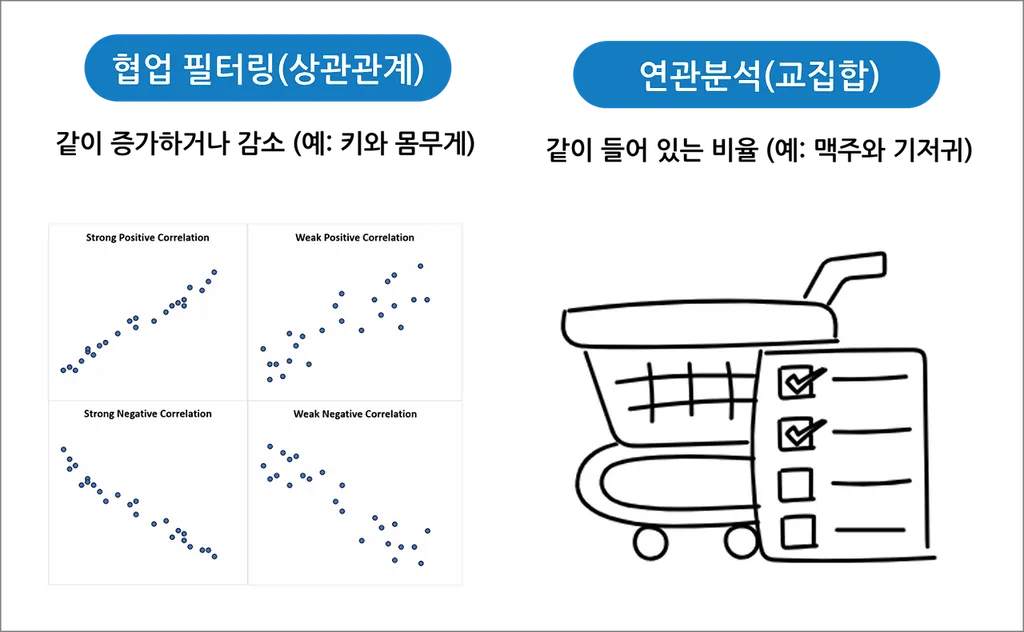

## 2. 주요 개념
-----
### (1) 연관규칙의 조건
1. 두 품목 함께 구매한 경우의 수가 일정 이상일 것 (일정 이상의 지지도)
2. 품목 A를 포함하는 거래 중 품목 B를 포함하는 경우의 수가 일정 이상일 것 (일정 이상의 신뢰도)         
             
#### 지지도 (Support)
* 전체 거래 항목 중 품목 A와 품목 B가 동시에 포함되는 거래의 비율
* 지지도 = $p({A}\cap{B})$
* 즉 조건절이 발생하는 확률
* 지지도가 낮은 경우, 우연일 수 있는 규칙이 포함, 실행 가능 인사이트 도출 어려움

#### 신뢰도 (Confidence)
* 품목 A를 포함하는 거래 수 중 품목 A와 품목 B가 동시에 포함되는 거래의 비율
* 신뢰도 = $\frac{p({A}\cap{B})}{P(A)}=\frac{지지도}{P(A)}$
* 신뢰도가 낮은 경우, 의미 없는 연관 규칙 도출하고 추천 실패로 이어짐.

### (2) 연관 분석의 평가 측도
3. 향상도: 품목 A가 주어지지 않았을 때 품목 B의 확률 대비, 품목 A가 주어졌을 때 품목 B의 증가 비율

#### 향상도 (Lift)
* A와 B가 우연히 함께 등장할 확률과 실제 함께 등장할 확률 비교.
* 향상도 = $\frac{P({A}\cap{B})}{P(A)P(B)}=\frac{신뢰도}{P(B)}$
* 독립일 때의 향상도는 1이 됨 -> 즉 서로 영향을 줄 경우 1이 아닌 다른 값 가짐.
* 실제로 관측한 $p({A}\cap{B})$이 기댓값보다
  - 크면 양의 연관성 (A사면 B삼)
  - 작으면 음의 연관성 (A사면 B 잘 안삼) (연관 없는거 아님 !!)
 
         * 즉 임의의 규칙1이 임의의 규칙 2보다 **효과적**이다 라고 얘기하려면 지지도, 신뢰도, 향상도 모두 1보다 클 경우에만 그렇다는 결론을 내릴 수 있음.


## 3. 활용 사례
* 넷플릭스 첫 오리지널 콘텐츠 <하우스 오브 카드> 제작 투자 건
  - 근거로 삼은 데이터
    1. **데이비드 핀처 감독의 영화**는 **시청 완료율**이 높았다.
    2. 영국판 <하우스 오브 카드>가 인기 있었다.
    3. 영국판 <하우스 오브 카드>를 본 사람들은 케빈 스페이시가 출연한 영화나 데이비드 핀처 감독의 영화를 보았다.
  - 지지도: 하우스오브 카드 $\cap$ 케빈 스페이시 콘텐츠의 지지도가 높았다        
            -> 사용자 기반 취향 파악
  - 신뢰도: $P({데이비드핀처감독콘텐츠 시청}\cap{끝까지 시청})$ 이 높았다        
            -> 핀처 감독 콘텐츠 본 사람은 끝까지 본 것이니, 오리지널 제작시 리스크 낮다
  - 향상도: '영국판 <하우스 오브 카드> 시청'과 '케빈 스페이시 콘텐츠 시청'의 향상도가 1 이상           
            -> 두 요소가 결합되면 사용자 반응 좋을 것

## 4. 연관 분석 알고리즘
-----
### (1) Apriori 알고리즘
: 선험적 경험을 이용한다. (A Priori)
* 배경: 연관 규칙 찾기 위해 가능한 모든 조합(A -> B)을 시도하는 것이 매우 비효율 적.
* Apriori 알고리즘
  - 개념: 상위 조합부터 차례로 스캔하며 특정 조합이 자주 발생하지 않는다면, 후속 조합들도 모두 배제하는 방식의 알고리즘
  - 장점: 하나의 조합만 검사하고도 파생된 다른 후보들도 배제할 수 있어 연산에 효과적.

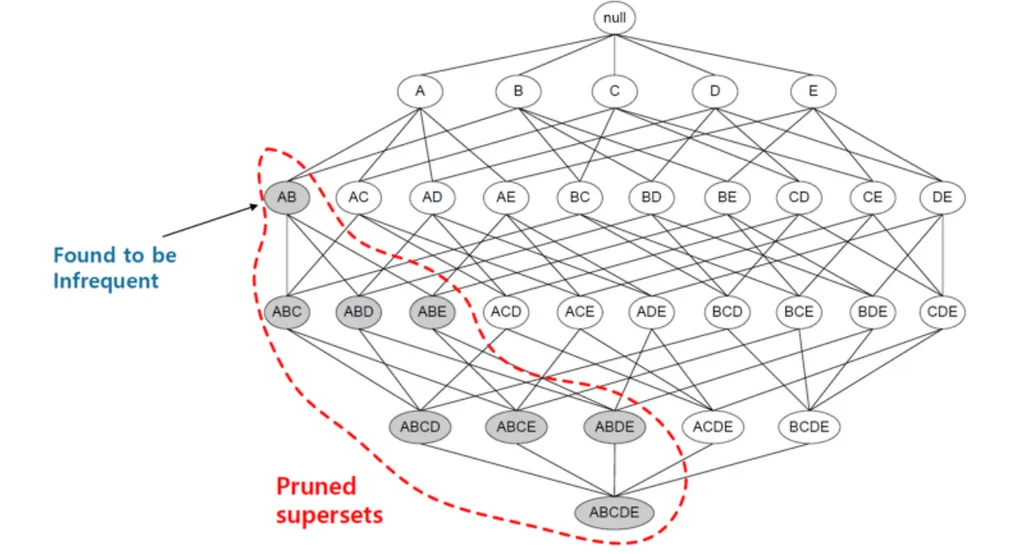

> 집합 {A,B}의 지지도가 사용자가 정한 최소 지지도 못넘음 -> {A,B} 포함해, 이를 포함하는 집합 {A,B,C} 등 모두 한번에 제거 됨

* Apriori 알고리즘 프로세스
  - 빈발 항목 집합(일정한 최소 지지도 넘는 항목들의 조합) 찾기 -> 단계적으로 조합 생성 후 필터링
  1. 단일 항목 집합 생성: 모든 개별 상품 지지도 계산 -> 최소 지지도 넘는 항목들만 다음단계로.
  2. 2개 항목 집합 생성: 1단계에서 선별된 상품들로 조합 만듦 -> 최소 지지도 넘는 조합들만 다음 단계로.
  3. 더 큰 항목 집합 생성: 위 과정을 n개 항목 집합으로 만들어 반복
  4. 최종 빈발 항목 집합 선정: 마지막으로 남은 빈발 항목 집합들을 바탕으로 연관 규칙 생성.
           
* Apriori 알고리즘 장단점
  - 장점: 수많은 상품 연관 구매 패턴 발견 가능
  - 단점: 현실적 중요 연관 규칙이 부족. 데이터 커지면 속도 느려짐

### (2) FP-Growth 알고리즘
: Apriori 연산 속도 문제 해결할 수 있게 자료구조 잘 이용한 알고르짐
* 배경: Apriori가 여전히 느림(각 단계에서 데이터를 스캔해야 하므로)
* FP-Growth 알고리즘
  - 개념: FP-Tree라는 구조 이용하여 Apriori를 효과적 구현 (Tree, Array,Linked_List)를 합쳐놓은 구조

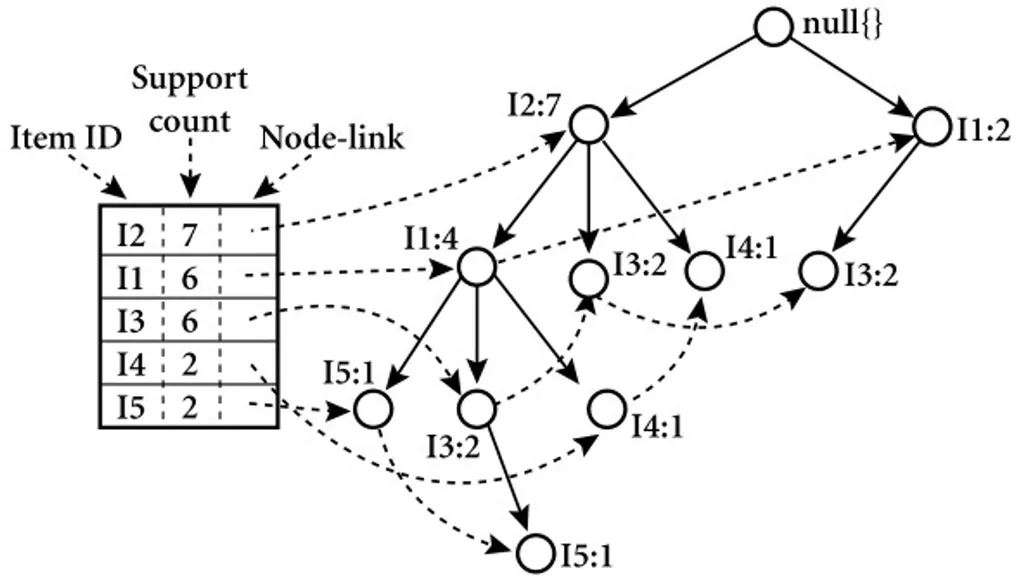

 - 모든 거래를 확인해 각 아이템마다 지지도를 계산, 최소 지지도 이상의 아이템만 선택함
* FP-Growth 알고리즘 프로세스
  1. 빈발 항목 필터링: 모든 항목의 빈도 계산 후 최소 지지도 이상인 항목만 남김
  2. 데이터 재정렬: 남은 항목들 각 거래별로 빈도순으로 재정렬.
  3. FP-Tree 생성: 재정렬 데이터를 바탕으로 FP-Tree 생성. 각 거래를 노드로 표현하며, 동일 항목은 기존 노드에 연결해 빈도 증가시키고 새로운 항목은 새로운 노드로 추가함
  4. 빈발 항목 집합 추출: FP-Tree 바탕으로 특정 항목을 기준으로 부분 트리 만들어 빈발 항목 집합 추출함. 기준이 된 항목과 연관된 빈발 항목 집합을 빠르게 도출 가능하다.
  5. 연관 규칠 도출: 위 빈발 항목 집합을 바탕으로 연관 규칙을 만듦. 3가지 지표를 계산해 가장 유용한 규칙 선택함.
        
* 장점
  - 데이터를 두 번만 스캔하므로 Aprior보다 빠름
  - 후보 item set 생성 필요 없이 tree만 구성하면 됨
* 단점
  - 대용량 데이터셋에서 메모리 효율이 떨어짐
  - Apriori에 비해 설계가 어렵고, 지지도 계산은 트리가 만들어 져야 가능함.